<a href="https://colab.research.google.com/github/Chamanjot03/Medical_cost/blob/main/Medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.svm import SVR
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
#Loading Data
df = pd.read_csv('medical data.csv')
#Data Information and Data Cleaning
df.head()
df.shape
df.columns
df.info()
duplicate = df[df.duplicated()]
duplicate
df = df.drop_duplicates()
print(df.isnull().sum())
df.describe().style.format("{:.3f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1337.000,1337.000,1337.000,1337.000
mean,39.222,30.663,1.096,13279.121
std,14.044,6.100,1.206,12110.360
min,18.000,15.960,0.000,1121.874
25%,27.000,26.290,0.000,4746.344
50%,39.000,30.400,1.000,9386.161
75%,51.000,34.700,2.000,16657.717
max,64.000,53.130,5.000,63770.428


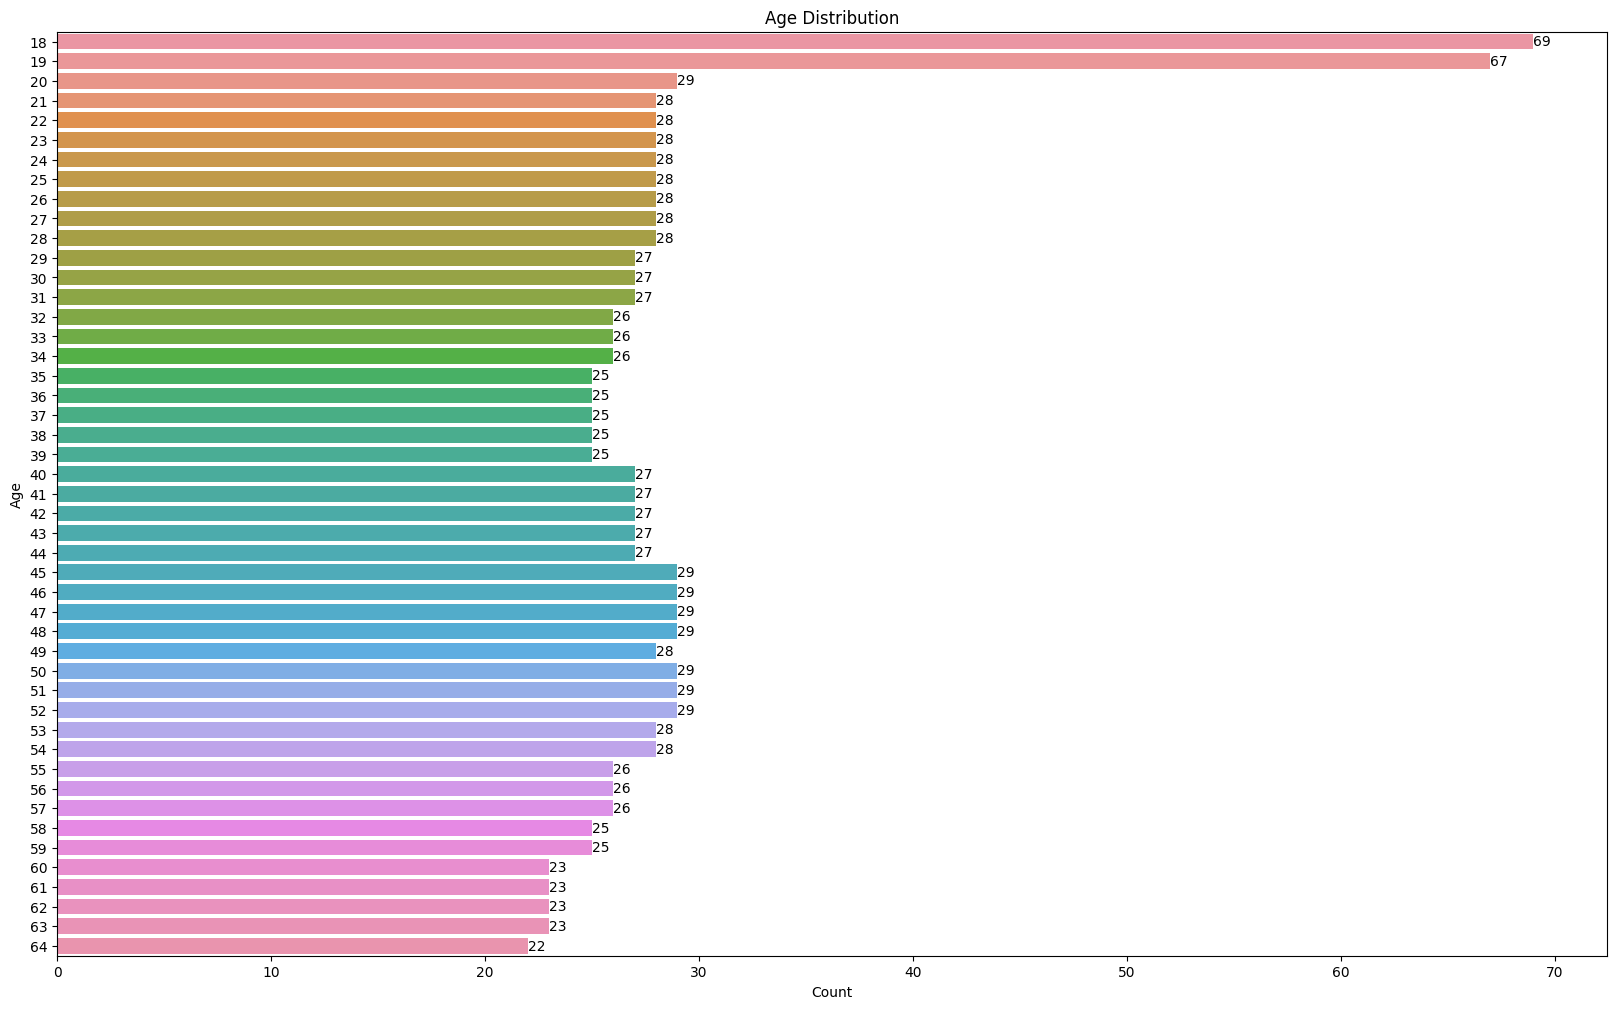

In [4]:
#Exploratory Data Analysis
plt.figure(figsize=(20,12))
ax = sns.countplot(data=df, y="age")
plt.xlabel('Count')
plt.ylabel('Age')
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.show()

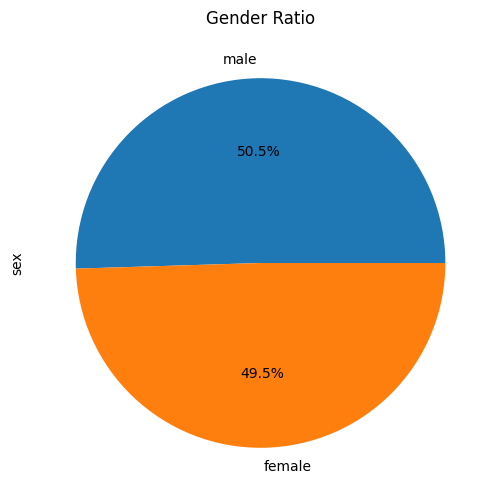

In [6]:
plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

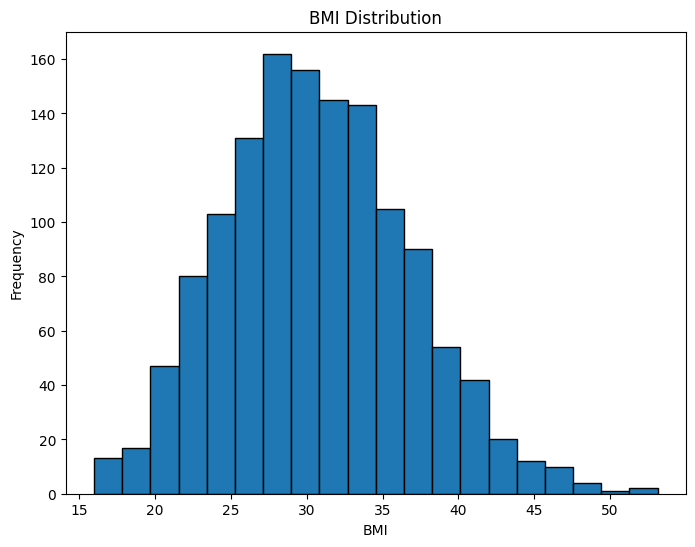

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

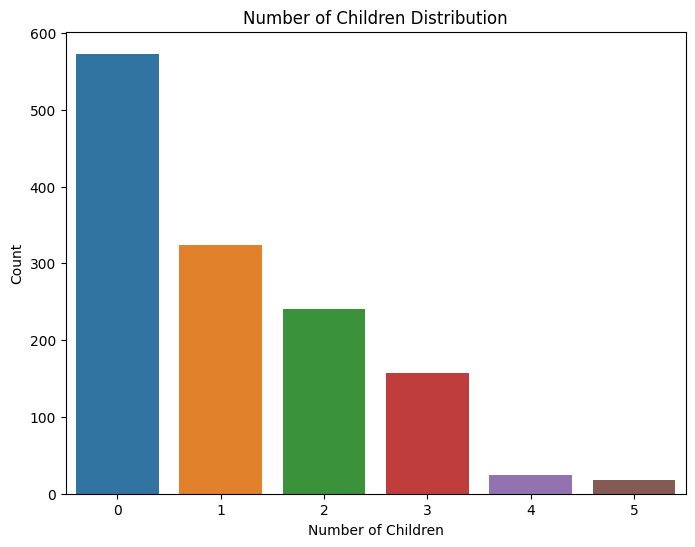

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

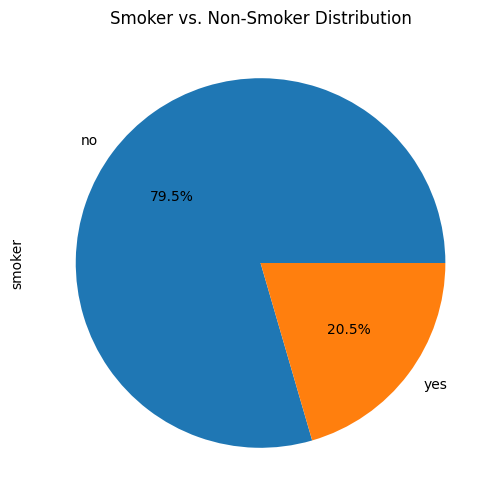

In [9]:
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

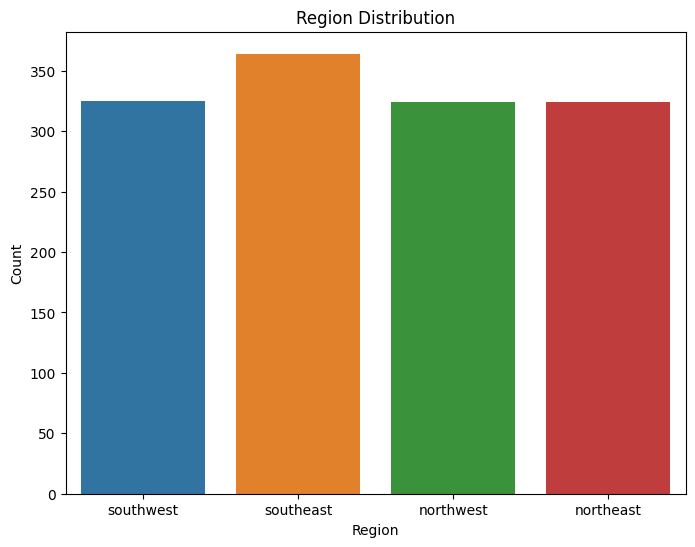

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

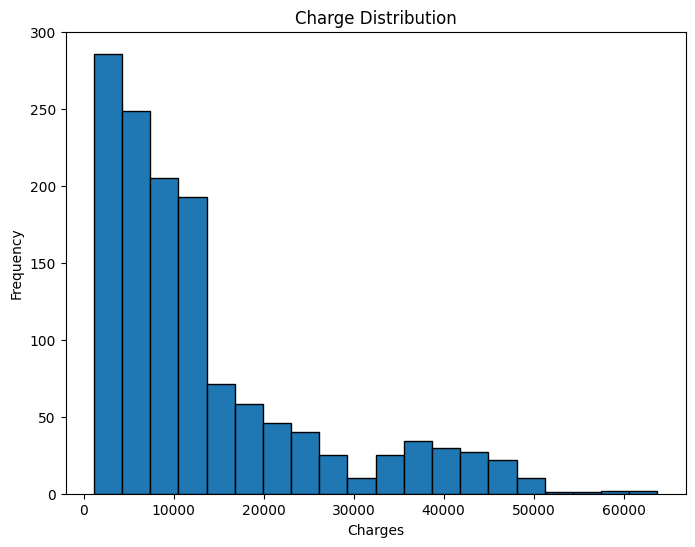

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['charges'], bins=20, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charge Distribution')
plt.show()

<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

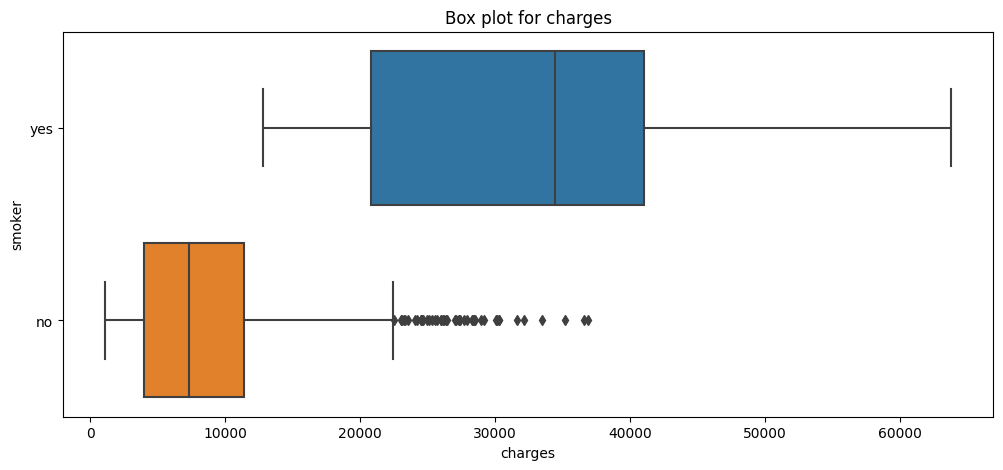

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data =  df, orient="h")

Text(0.5, 1.0, 'Scatter plot of age and charges')

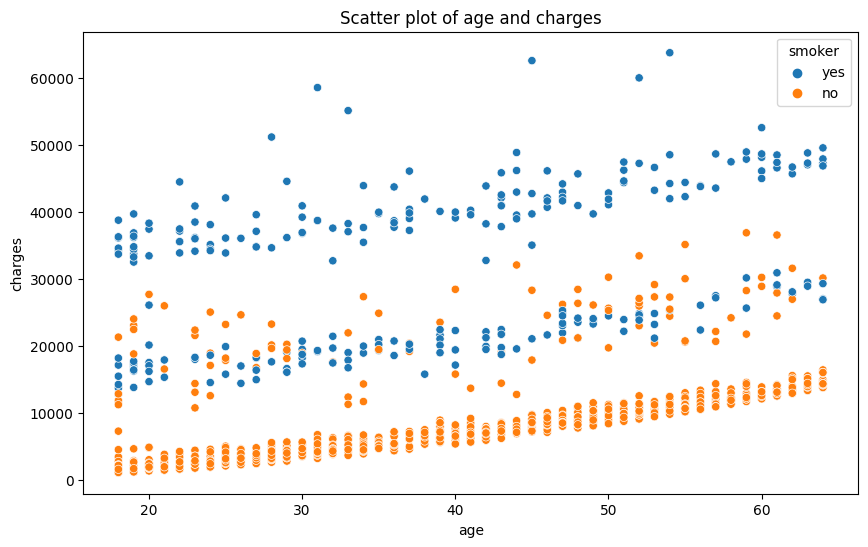

In [13]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age',y='charges',data=df,hue='smoker')
ax.set_title('Scatter plot of age and charges')

Text(0.5, 1.0, 'Scatter plot of bmi and charges')

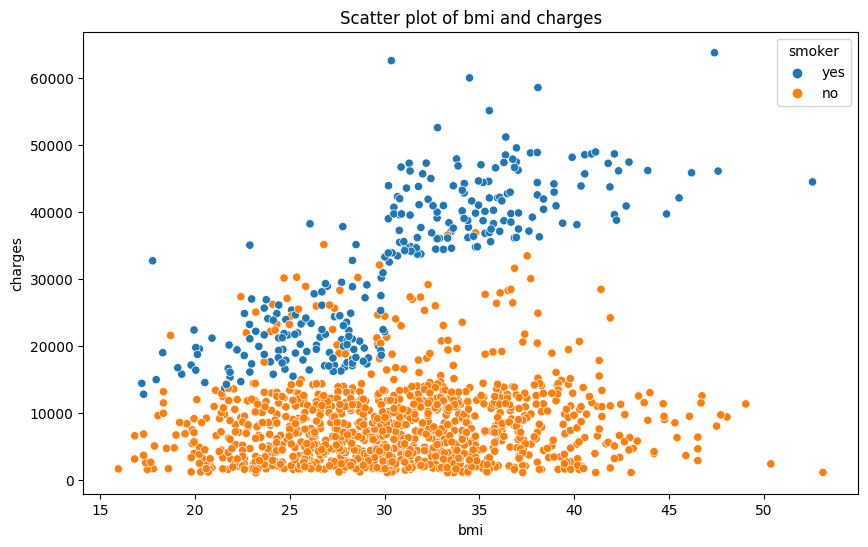

In [14]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
ax.set_title('Scatter plot of bmi and charges')

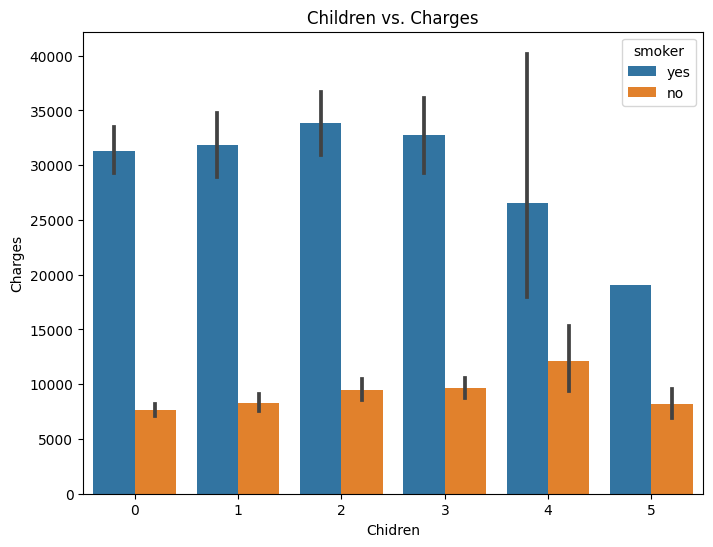

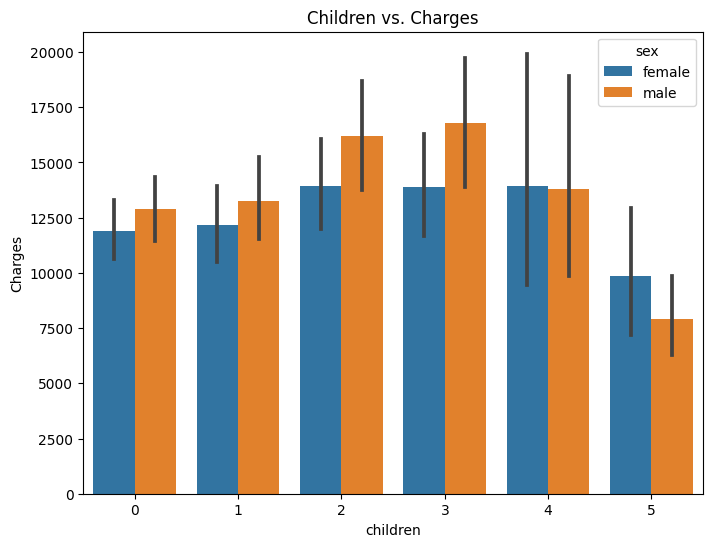

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='children', y='charges', hue='smoker')
plt.xlabel('Chidren')
plt.ylabel('Charges')
plt.title('Children vs. Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='children', y='charges', hue='sex')
plt.xlabel('children')
plt.ylabel('Charges')
plt.title('Children vs. Charges')
plt.show()

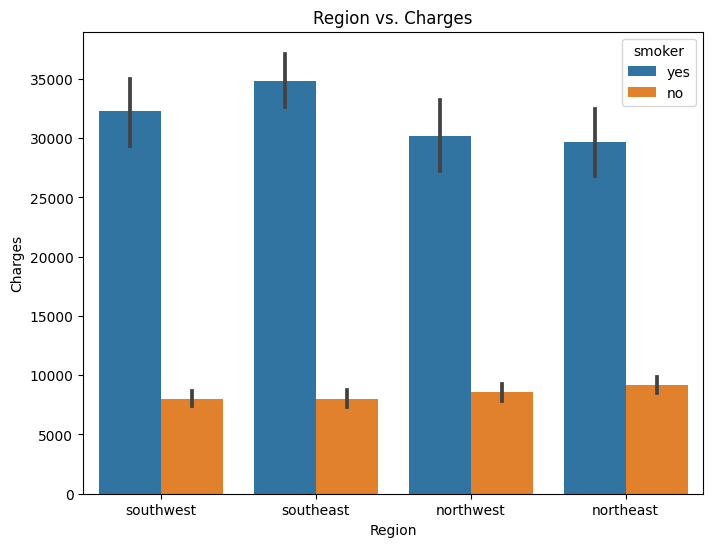

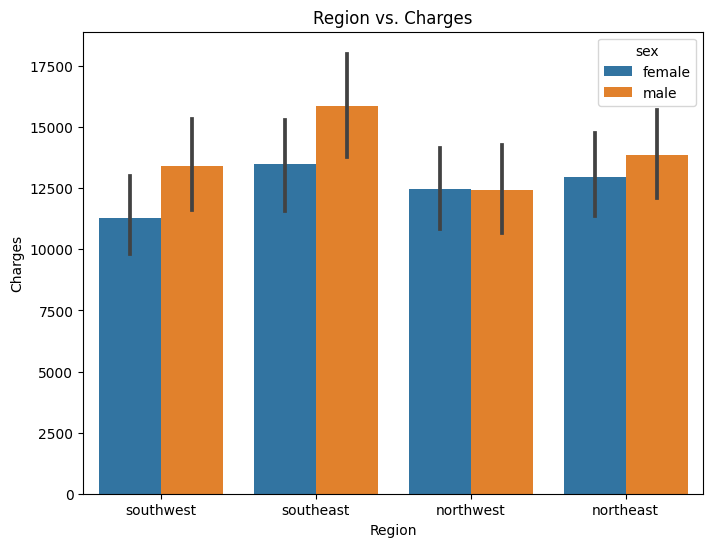

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

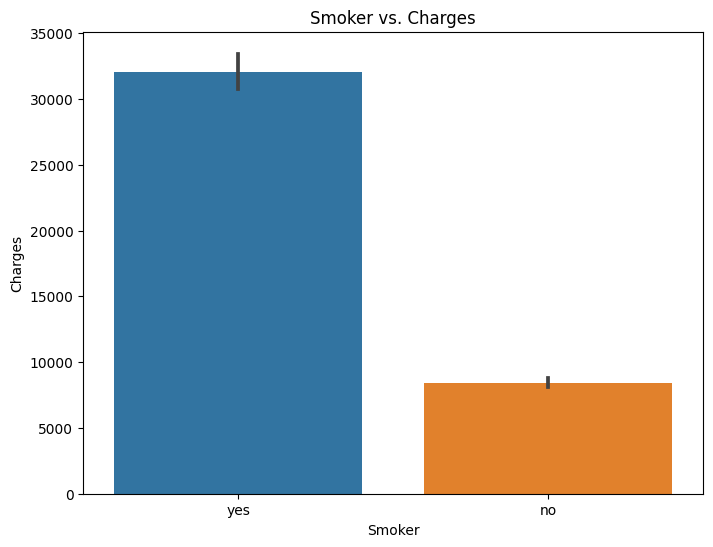

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

In [18]:
#Correlation matrix and Important Features
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region      0.006547
smoker     -0.787234
Name: charges, dtype: float64

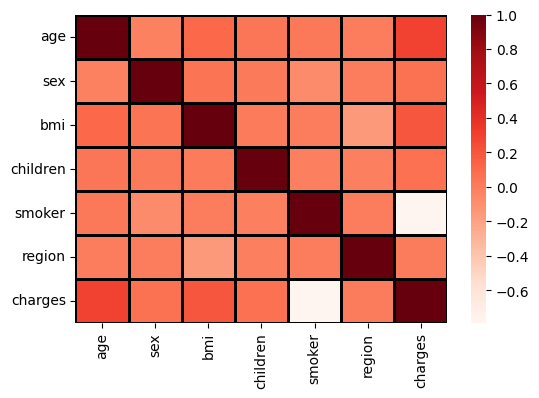

In [19]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

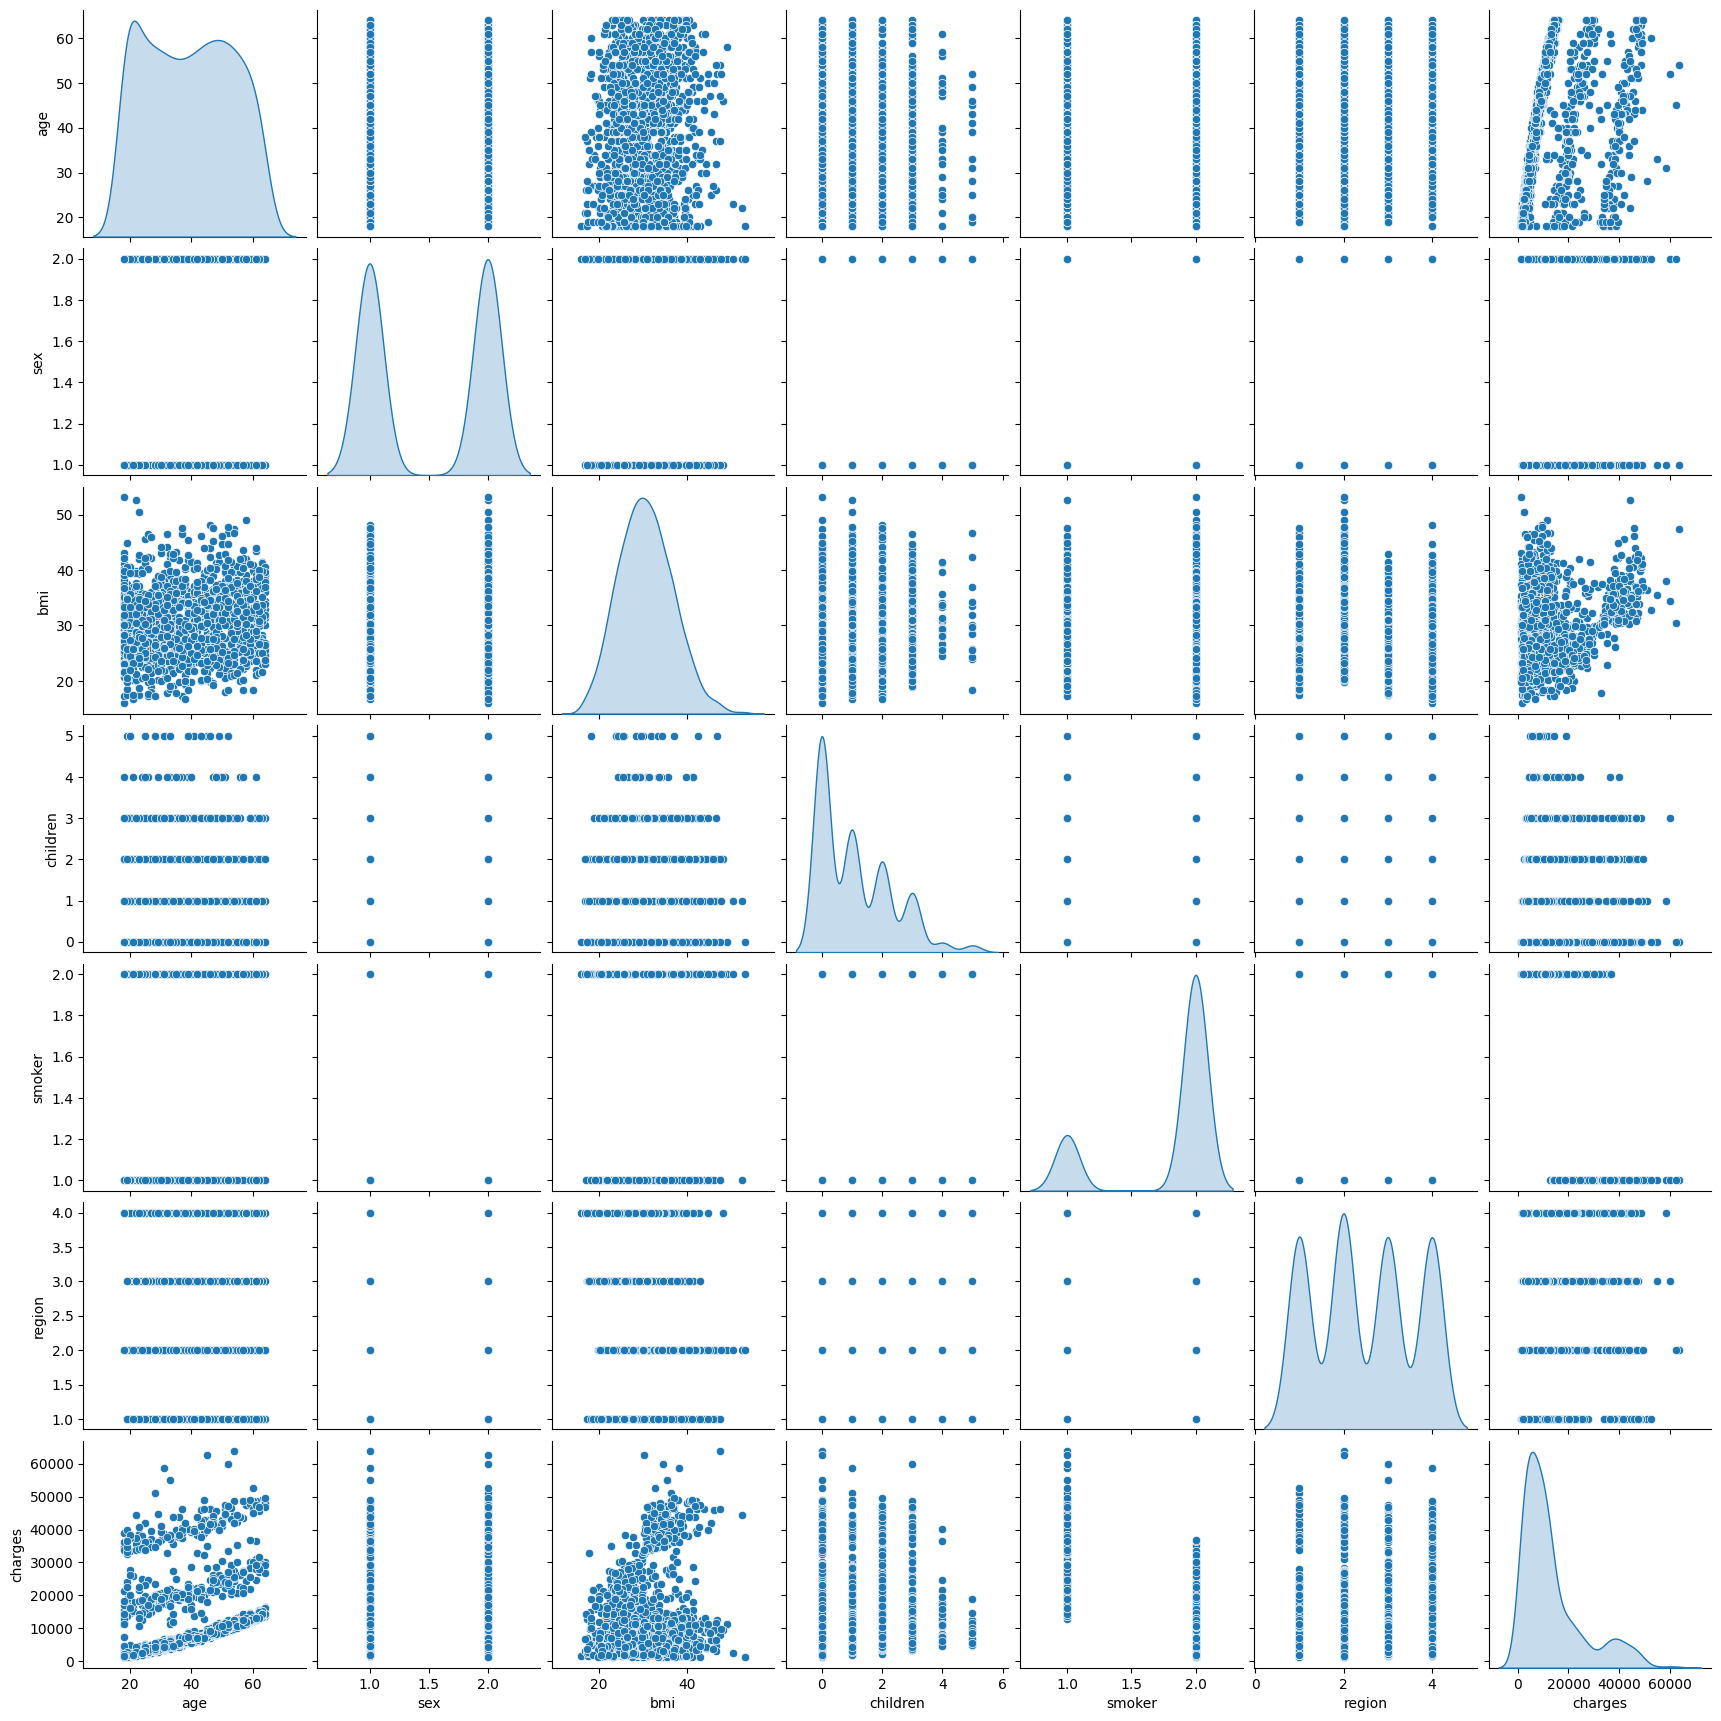

In [20]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [21]:
#Machine Learning Models
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)


In [22]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [23]:
def scores(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [24]:
#1. Linear Regressor Model
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

[0.8815739  0.84104889 0.85509915 0.86939486 0.85788515]


0.7494359237216639

In [25]:
#Gradient Boosting Regressor
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, Gradient_model.predict(X_test_scaled))

[0.93654311 0.89843925 0.92392734 0.94831519 0.92925657]


0.8413206672106028

In [26]:
# Decision Tree Regressor
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

[0.87762663 0.80747607 0.88749111 0.80975185 0.82118374]


0.7199117560609003

In [27]:
# Random Forest Regressor
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

[0.9353509  0.88749328 0.91969794 0.92893431 0.91592461]


0.825721979109755